In [1]:
%pwd

'/Users/r/Documents/stud/ss24/finnpinn/src'

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import common

In [7]:
base_dir = Path("../data_out/finn_different_loss_patterns")
ret_files = list(common.iter_final_retardation_files(base_dir, is_ret_OK=lambda arr: np.all(arr >= 1)))
len(ret_files)

15

In [17]:
all_rets = np.stack([np.load(p) for p in ret_files], axis=0).squeeze()

### Plot all Retardations

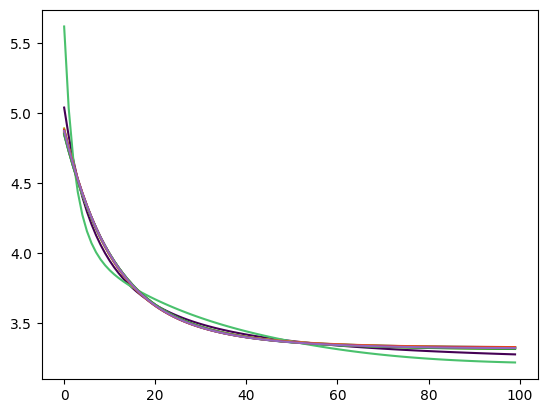

In [18]:
colormap = cm.viridis
colors = colormap(np.linspace(0, 1, 8))
lines = plt.plot(all_rets.T, alpha=1.0)

for line, color in zip(lines, colors):
    line.set_color(color)

plt.show()

# Compute Envelope Curve

In [8]:
envelope_curve_up = np.max(all_rets, axis=0)
envelope_curve_down = np.min(all_rets, axis=0)

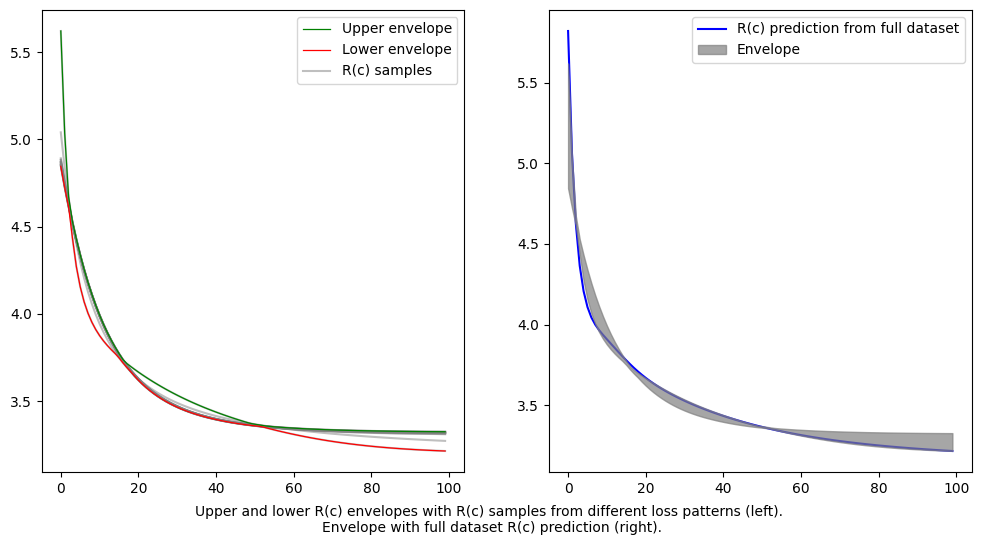

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.plot(envelope_curve_up, "g-", lw=0.9, label="Upper envelope")
ax1.plot(envelope_curve_down, "r-", lw=0.9, label="Lower envelope")
lines = ax1.plot(all_rets.T, color="grey", alpha=0.5, zorder=-2)
lines[-1].set_label("R(c) samples")
ax1.legend()

# compare with full dataset prediction
ret_full_c = np.load("../data_out/predicted_retardations/retPred_100.npy")
ax2.plot(ret_full_c, "b-", label="R(c) prediction from full dataset", zorder=-2)
ax2.fill_between(x=np.arange(envelope_curve_up.shape[0]), y1=envelope_curve_down, y2=envelope_curve_up, color='gray', alpha=0.7, label="Envelope")
ax2.legend()

fig.text(0.5, 0.01, "Upper and lower R(c) envelopes with R(c) samples from different loss patterns (left). \nEnvelope with full dataset R(c) prediction (right).", ha="center")

plt.show()

# Compare different envelopes from different "methods"